In [1]:
import random
import numpy as np
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

# Regressão Linear Múltipla

## Simulando Dados

Começaremos vendo como a entrada de múltiplas variáveis em uma regressão linear funciona a partir de conjuntos de dados sintéticos.

### Duas variáveis continuas

In [10]:
def simular_dado_mv(parametros_x1, parametros_x2, desvpad_E, samples):
    x1 = np.random.normal(loc=parametros_x1[0], scale=parametros_x1[1], size=samples)

    x2 = np.random.normal(loc=parametros_x2[0], scale=parametros_x2[1], size=samples)

    E = np.random.normal(loc=0, scale=desvpad_E, size=samples)

    y = parametros_x1[2] * x1 + parametros_x2[2] * x2 + E

    return pd.DataFrame({"x1": x1, "x2": x2, "y": y})

Podemos criar um DataFrame com nossos dados simulados para utilizarmos nossas ferramentas de EDA buscando visualizar a relação entre X1, X2 e Y

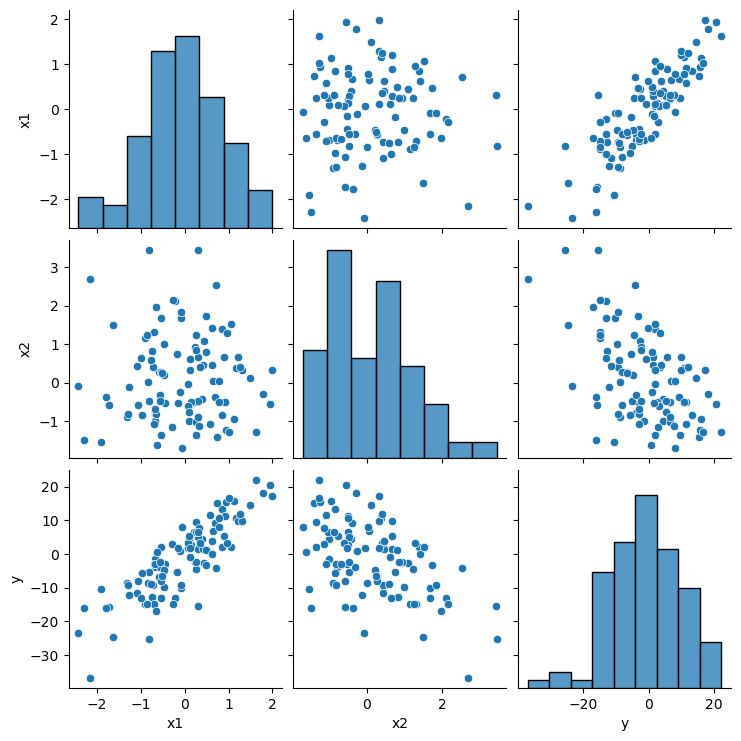

In [11]:
teste_mv = simular_dado_mv((0, 1, 10), (0, 1, -5), 1, 100)
sns.pairplot(teste_mv)

In [12]:
teste_mv.corr()

,x1,x2,y
x1,1.000000,0.001501,0.850873
x2,0.001501,1.000000,-0.517179
y,0.850873,-0.517179,1.000000


Agora, vamos utilizar nossa regressão para estimar os coeficientes associados à X1 e X2

In [13]:
X = sm.add_constant(teste_mv[["x1"]])
Y = teste_mv["y"]

modelo = sm.OLS(Y, X)
lm_fit = modelo.fit()
print(lm_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.721
Method:                 Least Squares   F-statistic:                     257.1
Date:                Thu, 27 Apr 2023   Prob (F-statistic):           3.80e-29
Time:                        19:41:16   Log-Likelihood:                -316.31
No. Observations:                 100   AIC:                             636.6
Df Residuals:                      98   BIC:                             641.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7276      0.579     -1.257      0.2

In [15]:
X = sm.add_constant(teste_mv[["x1", "x2"]])
Y = teste_mv["y"]
modelo = sm.OLS(Y, X)
lm_fit = modelo.fit()
print(lm_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.993
Model:                            OLS   Adj. R-squared:                  0.993
Method:                 Least Squares   F-statistic:                     6671.
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          1.36e-104
Time:                        19:43:05   Log-Likelihood:                -134.12
No. Observations:                 100   AIC:                             274.2
Df Residuals:                      97   BIC:                             282.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0671      0.095     -0.709      0.4

Podemos utilizar a biblioteca `sklearn` para conseguir a interface preditiva desta biblioteca:

In [19]:
modelo = LinearRegression()

X = teste_mv[["x1", "x2"]]

y = teste_mv["y"]

modelo.fit(X, y)

print(modelo.coef_)
print(modelo.intercept_)

[10.04233443 -5.00617314]
-0.06713529038037391


Vamos criar uma nova coluna em nosso DataFrame para conter nossas previsões:

In [20]:
teste_mv["pred"] = modelo.predict(teste_mv[["x1", "x2"]])

In [21]:
teste_mv

,x1,x2,y,pred
0,1.163718,0.374295,10.624605,9.745517
1,-0.833515,0.009647,-8.694093,-8.485863
2,-0.572194,0.271555,-6.706699,-7.172750
3,0.313340,3.444263,-15.556962,-14.163045
4,-0.723863,0.415983,-9.251449,-9.418888
...,...,...,...,...
95,-0.150486,-0.522325,1.764192,1.036479
96,1.067116,1.519751,2.019852,3.041061
97,0.960429,1.291015,3.422926,3.114773
98,1.021790,-1.275110,16.684656,16.577447


Agora, vamos comparar as relações de nossa variável resposta e variável prevista contra X1 e X2:

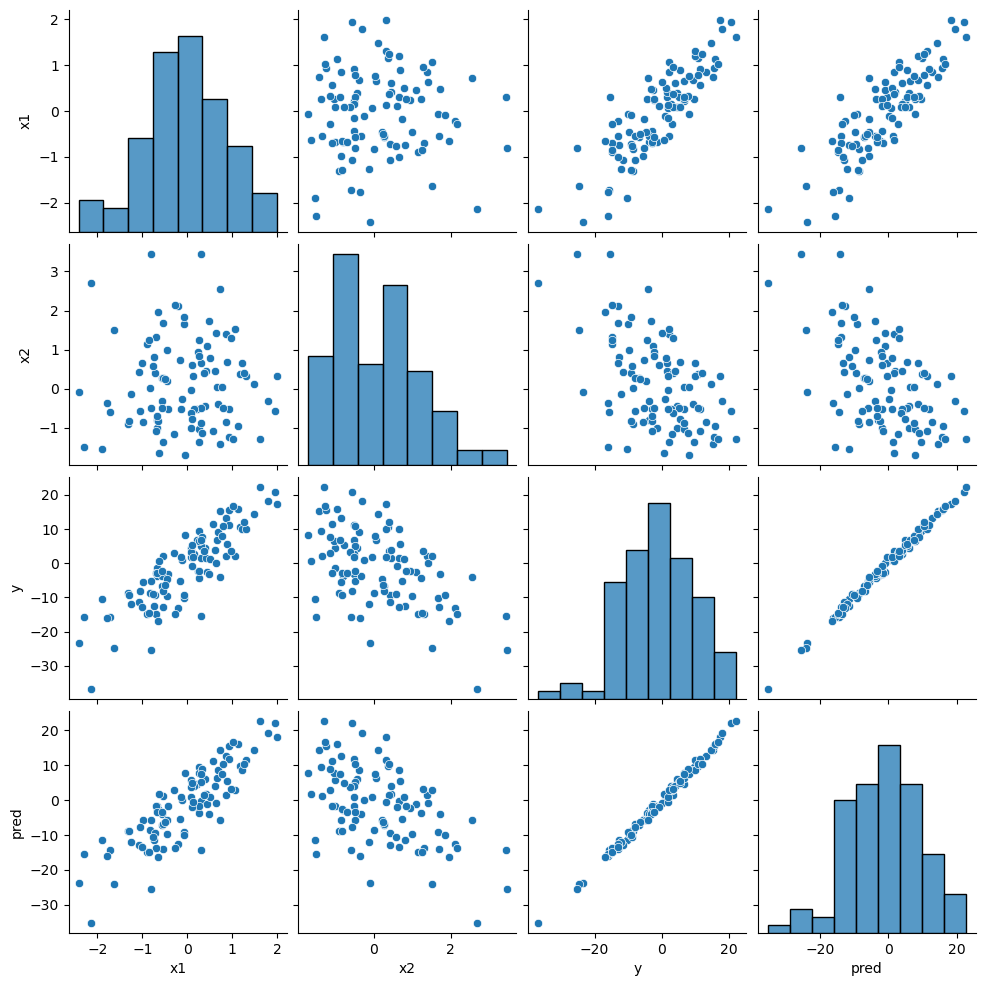

In [22]:
sns.pairplot(teste_mv)

### Simulando Variáveis Categóricas

Muitas variáveis que encontramos são **categóricas**, ou seja, não são numéricas. Vamos simular uma variável categórica com impacto linear sobre nossa variável Y:

In [23]:
def simular_dado_mv_cat(parametros_x1, categorias_dict, desvpad_E, samples):
    x1 = np.random.normal(loc=parametros_x1[0], scale=parametros_x1[1], size=samples)

    cat = random.choices(list(categorias_dict.keys()), k=samples)
    eff_cat = list(map(lambda x: categorias_dict[x], cat))

    E = np.random.normal(loc=0, scale=desvpad_E, size=samples)

    y = parametros_x1[2] * x1 + eff_cat + E
    return pd.DataFrame({"x1": x1, "categoria": cat, "y": y})

In [48]:
simular_dado_mv_cat((0, 1, 5), {"A": 1, "B": 5, "C": 10}, 1, 100)

,x1,categoria,y
0,1.042546,A,6.988955
1,-0.786135,B,2.102109
2,-1.189609,C,5.196965
3,0.118389,A,2.502681
4,0.461456,C,12.046891
...,...,...,...
95,-0.188119,C,8.483338
96,-0.219474,C,9.551482
97,0.012449,C,9.264561
98,0.024138,A,-0.373498


In [49]:
teste_mv_cat = simular_dado_mv_cat((0, 1, 5), {"A": 1, "B": 5, "C": 10}, 1, 100)

Podemos utilizar um BoxPlot para visualizar a relação entre nossa variável categórica e nossa variável resposta:

<Axes: xlabel='categoria', ylabel='y'>

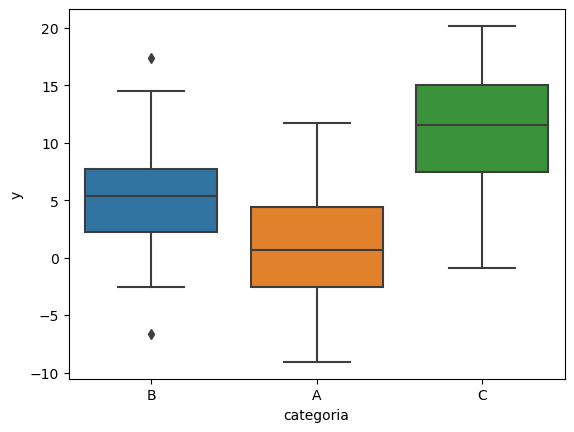

In [50]:
sns.boxplot(data=teste_mv_cat, x="categoria", y="y")

ou então alterar a cor dos pontos em um scatterplot, visualizando múltiplas relações ao mesmo tempo:

<Axes: xlabel='x1', ylabel='y'>

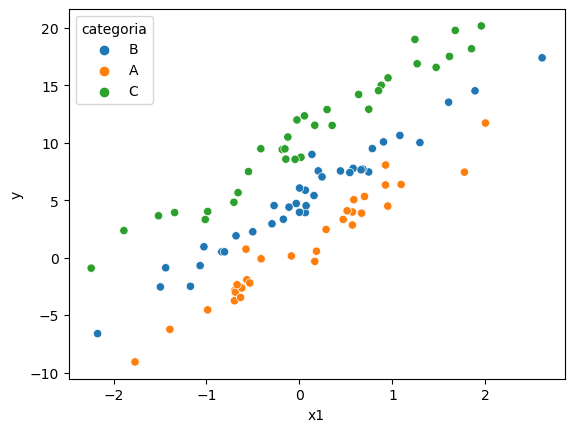

In [51]:
sns.scatterplot(data=teste_mv_cat, x="x1", y="y", hue="categoria")

In [52]:
teste_mv_cat["mcategoria_A"] = np.where(teste_mv_cat["categoria"] == "A", 1, 0)
teste_mv_cat["mcategoria_B"] = np.where(teste_mv_cat["categoria"] == "B", 1, 0)
teste_mv_cat["mcategoria_C"] = np.where(teste_mv_cat["categoria"] == "C", 1, 0)
teste_mv_cat

,x1,categoria,y,mcategoria_A,mcategoria_B,mcategoria_C
0,0.062685,B,3.922054,0,1,0
1,-0.565519,A,-1.927957,1,0,0
2,-0.272733,B,4.534436,0,1,0
3,-2.171085,B,-6.613208,0,1,0
4,-0.987500,A,-4.546743,1,0,0
...,...,...,...,...,...,...
95,1.888372,B,14.523670,0,1,0
96,0.000432,B,3.949991,0,1,0
97,-0.412342,A,-0.101217,1,0,0
98,0.904219,B,10.075995,0,1,0


#### Convertendo variáveis categóricas em variáveis dummy

Para utilizarmos variáveis categóricas em um modelo, precisamos transforma-las em variáveis **numéricas**. A forma mais simples de fazê-lo é através de **variáveis dummies**: vamos criar **uma variável binaria nova para cada nível de nossa variável categórica**. Em cada variável, esta terá valor 1 quando a observação for daquela categoria e 0 caso não.

Vamos utilizar um método da Sklearn para realizar essa transformação: o `OneHotEncoder`.

In [53]:
from sklearn.preprocessing import OneHotEncoder

In [54]:
ohe = OneHotEncoder(sparse_output=False, drop="first")

In [55]:
ohe.fit(teste_mv_cat[["categoria"]])

OneHotEncoder(drop='first', sparse_output=False)

Agora, vamos utilizar o método `.transform()` para obter nossas variáveis dummies:

In [56]:
ohe.transform(teste_mv_cat[["categoria"]])

array([[1., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [0., 0.],
       [0., 0.

Para saber qual coluna é qual nível da categoria, podemos utilizar o método `.get_feature_names_out()`:

In [57]:
ohe.get_feature_names_out()

array(['categoria_B', 'categoria_C'], dtype=object)

Vamos combinar esses dois métodos para criar um DataFrame com nossas variáveis dummies:

In [58]:
tb_dummies = pd.DataFrame(
    ohe.transform(teste_mv_cat[["categoria"]]),
    columns = ohe.get_feature_names_out()
)
tb_dummies.head()

,categoria_B,categoria_C
0,1.0,0.0
1,0.0,0.0
2,1.0,0.0
3,1.0,0.0
4,0.0,0.0


In [59]:
tb_teste = pd.concat([teste_mv_cat, tb_dummies], axis=1)

In [60]:
tb_teste

,x1,categoria,y,mcategoria_A,mcategoria_B,mcategoria_C,categoria_B,categoria_C
0,0.062685,B,3.922054,0,1,0,1.0,0.0
1,-0.565519,A,-1.927957,1,0,0,0.0,0.0
2,-0.272733,B,4.534436,0,1,0,1.0,0.0
3,-2.171085,B,-6.613208,0,1,0,1.0,0.0
4,-0.987500,A,-4.546743,1,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...
95,1.888372,B,14.523670,0,1,0,1.0,0.0
96,0.000432,B,3.949991,0,1,0,1.0,0.0
97,-0.412342,A,-0.101217,1,0,0,0.0,0.0
98,0.904219,B,10.075995,0,1,0,1.0,0.0


Vamos utilizar nossa nova tabela de dados para criar nossa regressão:

In [61]:
X = tb_teste[["x1", "categoria_B", "categoria_C"]]
y = tb_teste["y"]

lm_fit = LinearRegression()
lm_fit.fit(X, y)

LinearRegression()

E o método `.predict()` para criar uma variável com nossas previsões:

In [62]:
lm_fit.predict(X)

array([ 5.28629093, -2.05070912,  3.59590745, -5.97109158, -4.1773406 ,
       -8.11505209, 17.69737399, 14.72019604, 10.37165382, -2.70422345,
        5.47002493,  7.19392032, -6.22352631,  0.76163154,  5.1811133 ,
       11.78365078, 11.11768787,  9.74159374,  5.29048956,  6.31065992,
        9.35610265, 14.04478221, -1.0019668 ,  3.16831647,  4.16863089,
       -2.28110604,  7.88168974, 18.42158553, 11.50109516,  8.72370187,
       19.61596944,  6.95934803, 13.05762366, 20.14551521, -0.41371616,
       -0.20754598,  3.74631129,  0.36275341, -2.67441856,  9.49993096,
       18.73382278,  5.31330982,  9.65765376,  2.44233177,  3.66802298,
        5.99028171, 10.41500376,  8.40943095,  4.09814539,  4.79474468,
       18.12462779, -2.32549797, 12.06057386,  0.90739498, 10.15093099,
        8.30970784, -2.56812008, -2.72414032, 10.88215528,  6.1940464 ,
       -2.58073939,  3.67538287,  4.32474578,  0.76967087,  5.33174607,
       14.57394205, 10.05313633, 10.5569012 ,  9.54970759,  1.62

In [63]:
tb_teste['pred'] = lm_fit.predict(X)

<Axes: xlabel='x1', ylabel='y'>

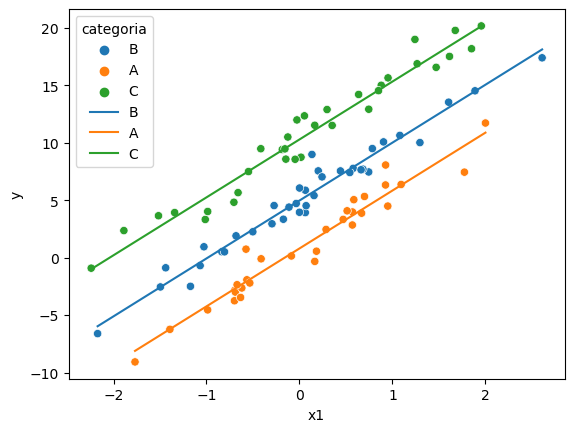

In [64]:
sns.scatterplot(data = tb_teste, x = "x1", y = "y", hue = "categoria")
sns.lineplot(data = tb_teste, x = "x1", y = "pred", hue = "categoria")

Como podemos interpretar os coeficientes das categorias B e C? O que aconteceu com a categoria A?

In [65]:
print(list(zip(lm_fit.feature_names_in_, lm_fit.coef_)))

[('x1', 5.039635455082179), ('categoria_B', 4.171085470065423), ('categoria_C', 9.488129060657217)]


In [66]:
print(lm_fit.intercept_)

0.7992983635563542


## Transformações não-lineares

A regressão linear é um método estatístico usado para encontrar uma relação entre duas variáveis, onde uma variável é a "variável dependente" e a outra é a "variável independente". Na regressão linear com transformação de variáveis, estamos procurando por um relacionamento entre essas duas variáveis que não seja necessariamente linear. 

Por exemplo, se temos dados de altura e peso, podemos usar a regressão linear para ver como o peso está relacionado à altura - mas, às vezes, essa relação nem sempre parece seguir uma linha reta. É aí que entram as transformações de variáveis: podemos aplicar uma função matemática (como o logaritmo, por exemplo) a uma ou ambas as variáveis para tentar encontrar uma relação mais clara entre elas.

As transformações nos permitem ajustar os dados a um modelo mais adequadamente e, assim, fazer previsões mais precisas. No geral, a regressão linear com transformação de variáveis é usada para entender melhor a relação entre duas variáveis e fazer previsões mais precisas com base nessa relação. Espero que isso ajude!

In [68]:
def simular_dado_nl(parametros_x1, desvpad_E, samples):
    x1 = np.random.normal(loc=parametros_x1[0], scale=parametros_x1[1], size=samples)

    E = np.random.normal(loc=0, scale=desvpad_E, size=samples)

    y = np.exp(parametros_x1[2] * x1  + E)

    return pd.DataFrame({"x1": x1, "y": y})

In [69]:
tb_nl = simular_dado_nl((1, 0.3, 2.5), 0.35, 1000)

Vamos visualizar a relação entre X e y:

<Axes: xlabel='x1', ylabel='y'>

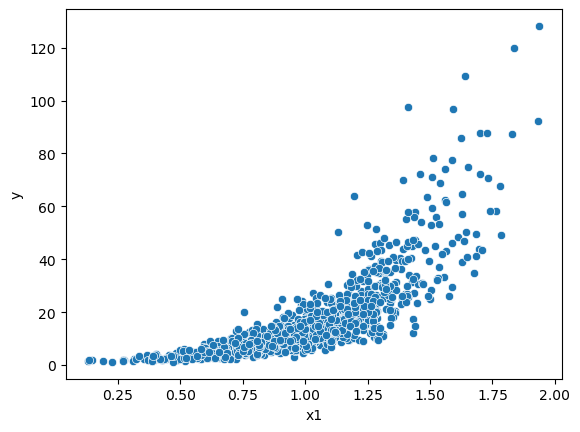

In [70]:
sns.scatterplot(data = tb_nl, x = "x1", y = "y")

Claramente existe uma relação entre x1 e y, mas ela pode ser representada por uma linha reta?

In [71]:
X = tb_nl[["x1"]]
y = tb_nl["y"]
lm_fit = LinearRegression()
lm_fit.fit(X, y)

tb_nl["pred_lin"] = lm_fit.predict(X)


<Axes: xlabel='x1', ylabel='y'>

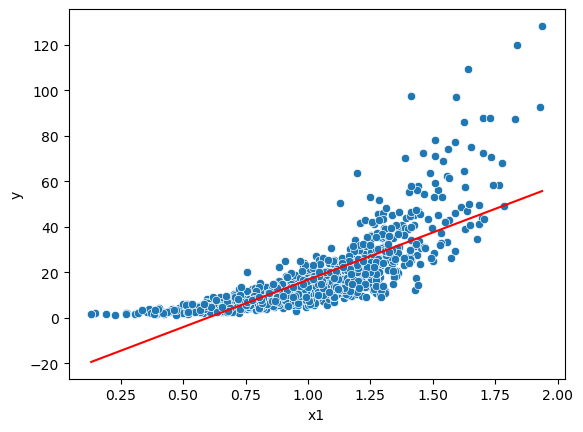

In [72]:
sns.scatterplot(data = tb_nl, x = "x1", y = "y")
sns.lineplot(data = tb_nl, x = "x1", y = "pred_lin", color = "red")

O gráfico acima apresenta duas *"evidências"* típicas de uma transformação específica:

* O efeito de x1 sobre y parece *crescer* conforme x1 aumenta - a curva apresenta um crescimento *exponencial*;
* A dispersão ao redor dessa curva imaginária *aumenta* conforme x1 (e y) aumenta.

Essas duas evidências (não-linearidade e heterosquedasticidade) são evidêcias de uma transformação logarítmica - x1 tem uma relação linear com o logaritmo de y! Vamos aplicar essa transformação em nosso modelo:

In [73]:
tb_nl["log_y"] = np.log(tb_nl["y"])
tb_nl.head()

,x1,y,pred_lin,log_y
0,1.207648,41.584330,25.307128,3.727723
1,0.953415,3.163922,14.739693,1.151812
2,1.175294,9.446908,23.962284,2.245687
3,1.004172,10.062086,16.849441,2.308775
4,0.825852,5.190945,9.437414,1.646916


<Axes: xlabel='x1', ylabel='log_y'>

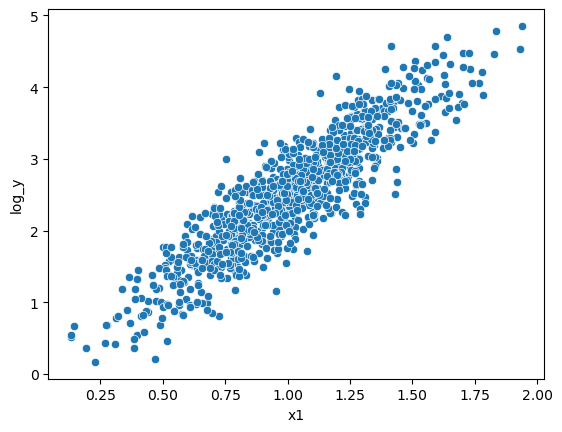

In [74]:
sns.scatterplot(data = tb_nl, x = "x1", y = "log_y")

Vamos construir nossa regressão através dessa nova variável y:

In [75]:
X = tb_nl[["x1"]]
y = tb_nl["log_y"]
lm_fit = LinearRegression()
lm_fit.fit(X, y)

tb_nl["pred_log"] = lm_fit.predict(X)


<Axes: xlabel='x1', ylabel='log_y'>

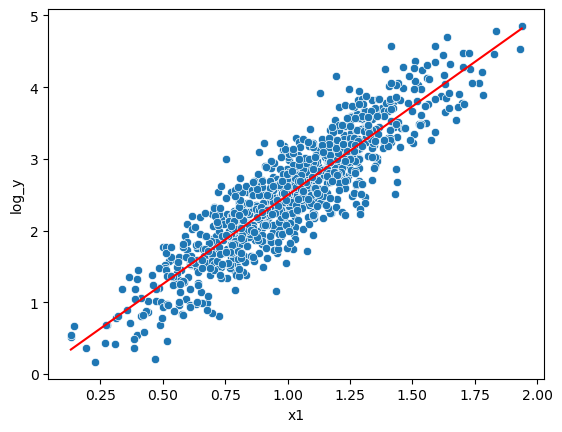

In [77]:
sns.scatterplot(data = tb_nl, x = "x1", y = "log_y")
sns.lineplot(data = tb_nl, x = "x1", y = "pred_log", color = "red")

Agora nossa regressão está bem ajustada! Mas nossas previsões estão em logaritmo, como podemos voltar para a escala original?

<Axes: xlabel='x1', ylabel='y'>

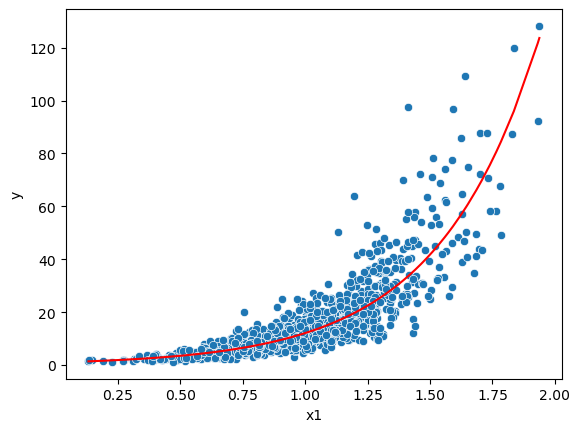

In [78]:
tb_nl["pred_exp"] = np.exp(tb_nl["pred_log"])
sns.scatterplot(data = tb_nl, x = "x1", y = "y")
sns.lineplot(data = tb_nl, x = "x1", y = "pred_exp", color = "red")


Por último, vamos olhar duas outras transformações importantes:
1. A relação onde x1 é inversamente proporcional ao logaritmo de y,
1. a relação onde o logaritmo de x1 é diretamente proporcional à y.

<Axes: xlabel='x1', ylabel='y'>

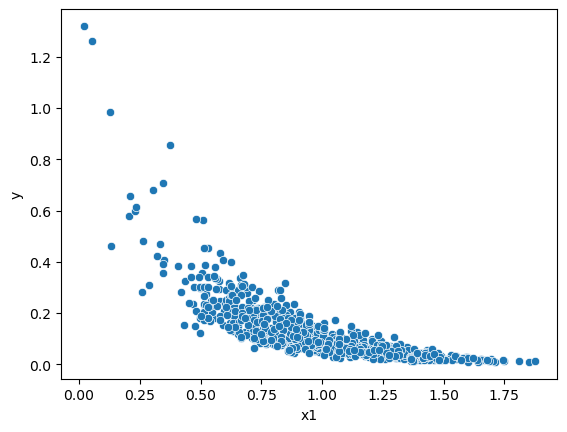

In [79]:
tb_nl_inv = simular_dado_nl((1, 0.3, -2.5), 0.35, 1000)
sns.scatterplot(data = tb_nl_inv, x = "x1", y = "y")

In [80]:
def simular_dado_nl_2(parametros_x1, desvpad_E, samples):
    x1 = np.random.normal(loc=parametros_x1[0], scale=parametros_x1[1], size=samples)

    E = np.random.normal(loc=0, scale=desvpad_E, size=samples)

    y = parametros_x1[2] * np.exp(x1)  + E

    return pd.DataFrame({"x1": x1, "y": y})

<Axes: xlabel='x1', ylabel='y'>

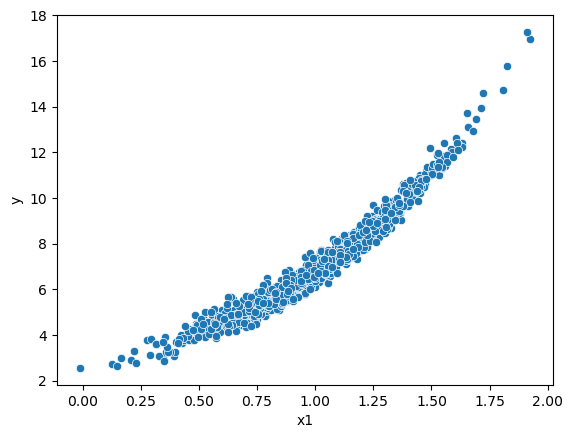

In [81]:
tb_nl_inv = simular_dado_nl_2((1, 0.3, 2.5), 0.35, 1000)
sns.scatterplot(data = tb_nl_inv, x = "x1", y = "y")

<Axes: xlabel='exp_x1', ylabel='y'>

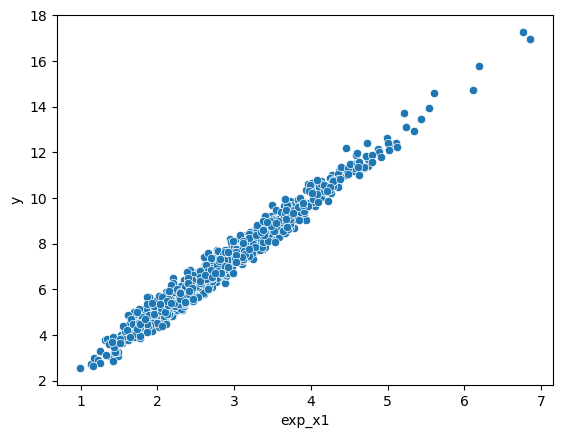

In [87]:
tb_nl_inv["exp_x1"] = np.exp(tb_nl_inv["x1"])
sns.scatterplot(data = tb_nl_inv, x = "exp_x1", y = "y")

In [ ]:
def simular_dado_nl_2(parametros_x1, desvpad_E, samples):
    x1 = np.random.normal(loc=parametros_x1[0], scale=parametros_x1[1], size=samples)

    E = np.random.normal(loc=0, scale=desvpad_E, size=samples)

    y = np.exp(parametros_x1[2] * np.log(x1)  + E)

    return pd.DataFrame({"x1": x1, "y": y})

In [96]:
tb_nl_inv = simular_dado_nl_2((100, 2, 2.5), 0.35, 1000)

<Axes: xlabel='x1', ylabel='y'>

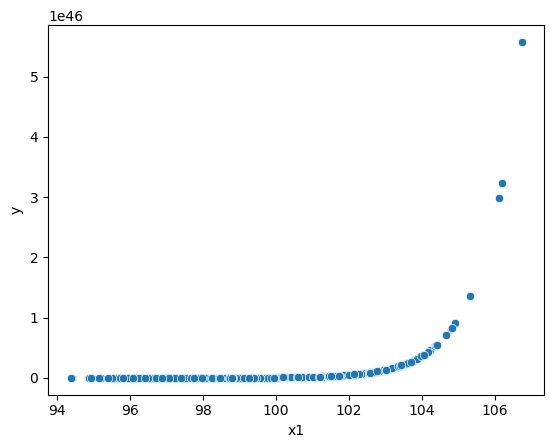

In [97]:
sns.scatterplot(data = tb_nl_inv, x = "x1", y = "y")

<Axes: xlabel='log_x1', ylabel='log_y'>

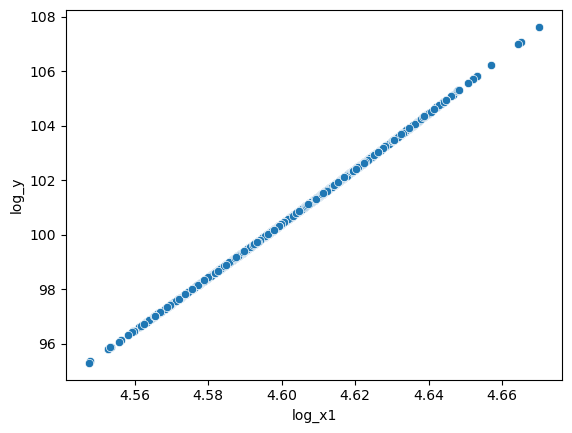

In [101]:
tb_nl_inv["log_y"] = np.log(tb_nl_inv["y"])
tb_nl_inv["log_x1"] = np.log(tb_nl_inv["x1"])
sns.scatterplot(data = tb_nl_inv, x = "log_x1", y = "log_y")

Além de transformações logarítmicas, temos outras transformações menos comuns como a quadrática, ou a exponencial. O importante é lembrarmos que **qualquer** operação válida em uma variável pode ser utilizada para transforma-la - e que a escolha da transformação correta é uma parte importante do processo de modelagem. Muitas vezes, a transformação correta é encontrada através de tentativa e erro e de análise exploratória.

Devemos sempre nos lembrar que as transformações sobre a variável resposta alteram a relação desta com todas as nossas variáveis X - e que alteram o **domínio**, ou seja, o range de valores que nossa variável y poderá assumir. No caso da transformação logarítimica de y temos que y > 0, por exemplo.

# Trabalhando exemplos reais
## Prevendo Consumo de Combustível

In [119]:
tb_autompg = pd.read_csv("data/tb_autompg.csv", na_values = "?")

In [120]:
tb_autompg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [121]:
tb_autompg.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


- Inversamente prop. às displacement, horsepower, weight (não-linear, possivelmente log);
- Cylinders é discreta! Converte-la para str


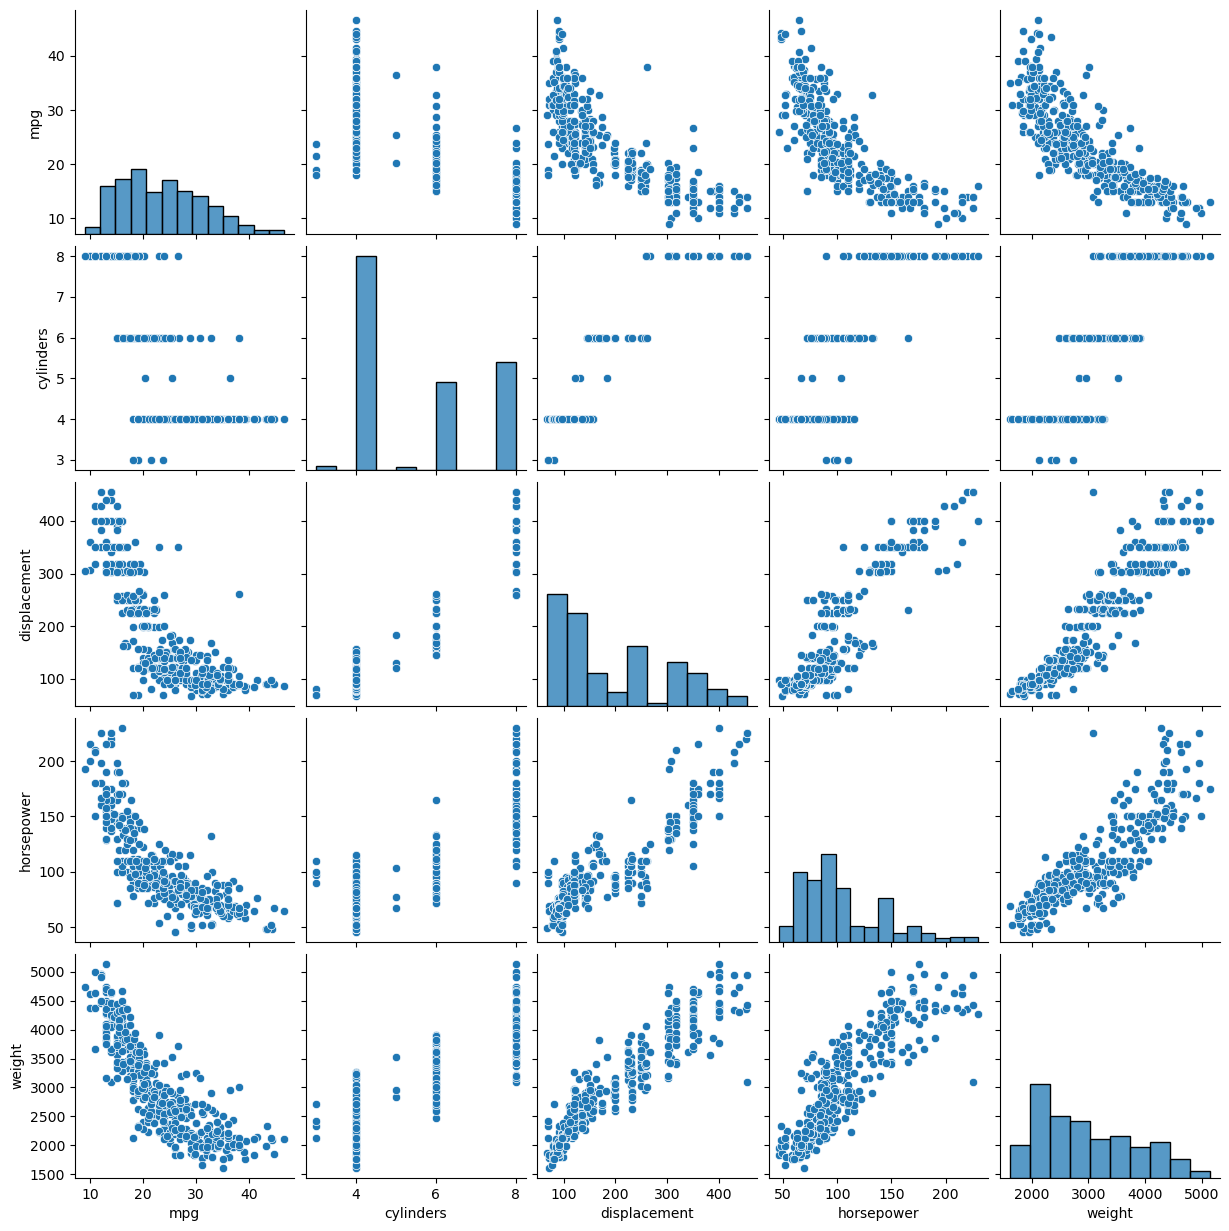

In [122]:
sns.pairplot(tb_autompg[["mpg", "cylinders", "displacement", "horsepower", "weight"]])

In [123]:
tb_autompg["log_mpg"] = np.log(tb_autompg["mpg"])
tb_autompg["cylinders"] = tb_autompg["cylinders"].astype(str)

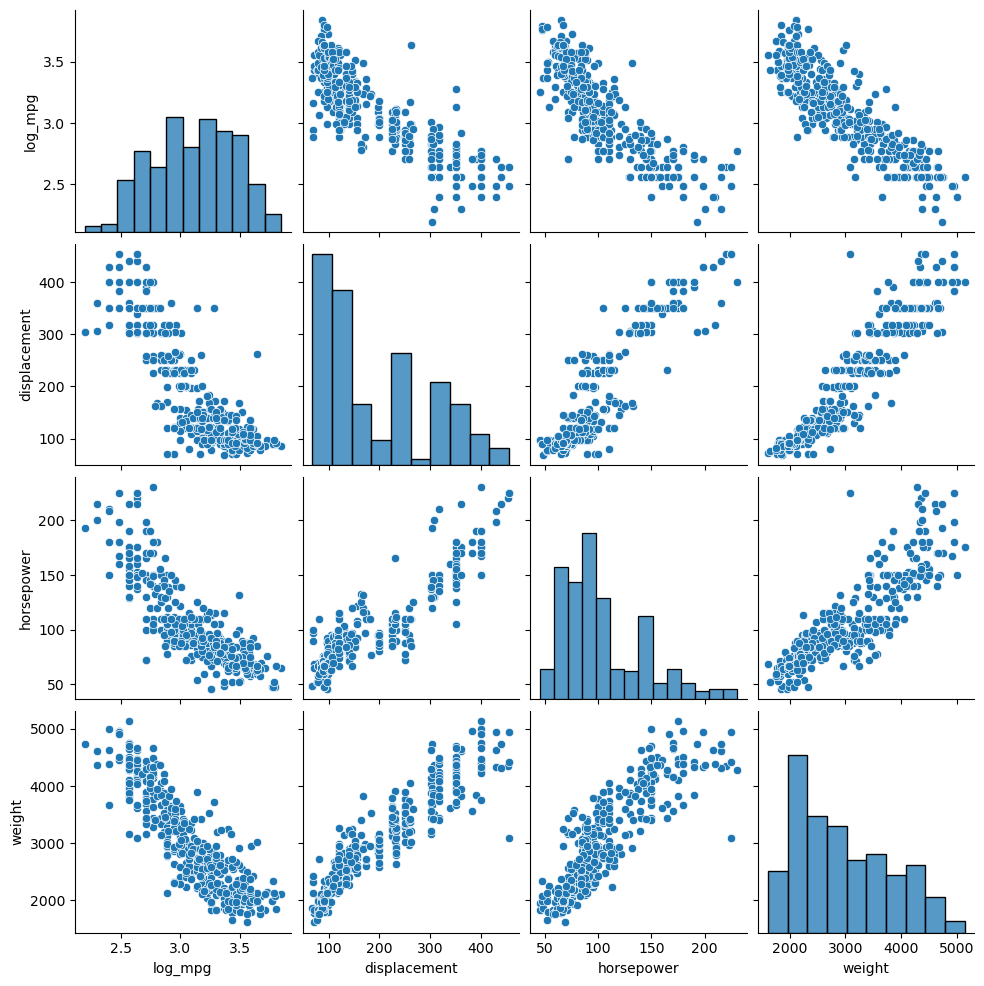

In [125]:
sns.pairplot(tb_autompg[["log_mpg", "displacement", "horsepower", "weight"]])

<Axes: xlabel='cylinders', ylabel='log_mpg'>

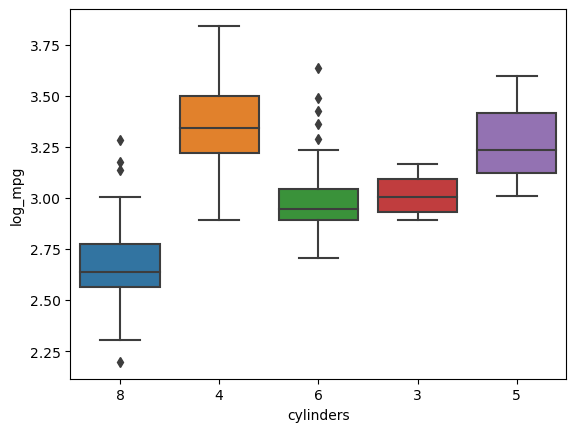

In [126]:
sns.boxplot(data = tb_autompg, x = "cylinders", y = "log_mpg")

<Axes: xlabel='horsepower', ylabel='log_mpg'>

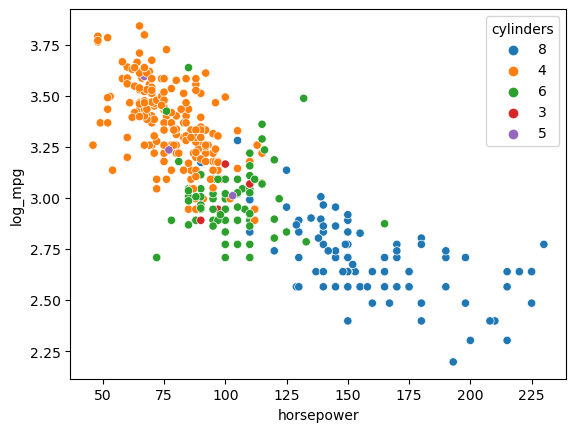

In [127]:
sns.scatterplot(data = tb_autompg, x = "horsepower", y = "log_mpg", hue = "cylinders")

In [131]:
tb_autompg_nona = tb_autompg.dropna().copy()

In [140]:
X = sm.add_constant(tb_autompg_nona[["horsepower", "weight"]])
y = tb_autompg_nona["log_mpg"]
reg = sm.OLS(y, X)
reg_fit = reg.fit()
print(reg_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                log_mpg   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     722.7
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          9.89e-132
Time:                        21:32:27   Log-Likelihood:                 171.10
No. Observations:                 392   AIC:                            -336.2
Df Residuals:                     389   BIC:                            -324.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.1109      0.029    139.983      0.0

In [141]:
tb_autompg_nona["hp_8cyl"] = np.where(
    tb_autompg_nona["cylinders"] == "8",
    tb_autompg_nona["horsepower"],
    0
)

<Axes: xlabel='hp_8cyl', ylabel='mpg'>

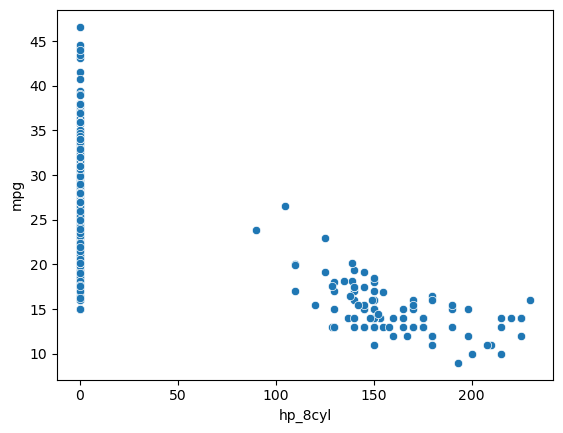

In [146]:
sns.scatterplot(data = tb_autompg_nona, x = "hp_8cyl", y = "mpg")

In [145]:
X = sm.add_constant(tb_autompg_nona[["horsepower", "weight", "hp_8cyl"]])
y = tb_autompg_nona["mpg"]
reg = sm.OLS(y, X)
reg_fit = reg.fit()
print(reg_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.726
Model:                            OLS   Adj. R-squared:                  0.723
Method:                 Least Squares   F-statistic:                     341.8
Date:                Thu, 27 Apr 2023   Prob (F-statistic):          1.60e-108
Time:                        21:36:10   Log-Likelihood:                -1107.8
No. Observations:                 392   AIC:                             2224.
Df Residuals:                     388   BIC:                             2239.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.5654      1.219     41.471      0.0

In [ ]:
# Para cada cavalo de potência em motores com MENOS de 8 ciclindros, cai em -0.1 a eficiencia medida em MPG
# Para cada cavalo de pot&encia em motores com 8 ciclindros, cai em -0.0968 + 0.0344 = -0.0624

# Um carro com menos de 8 cilindros, ao perder 10 cavalos , faz 1 milha a mais por galão
# Um carro com 8 ciclidnros, ao perder 10 cavalos, faz 0,6 a mais por galão

## Prevendo Aluguéis de Bicicleta

In [ ]:
tb_bike = pd.read_csv("data/tb_bikesharing.csv")

In [ ]:
tb_bike.describe()